## IA301 - Practical work on decision trees and ontologies

Membres du groupe : 
- Sami ALLANI
- Marie-Elisabeth CAMPO
- Samuel FLANDRIN
- Abdelkarim MOUSSAID
- Léa PAPILLON
- Louis-Gabriel POUILLOT

In [1]:
import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()

import pandas as pd
X = [[0, 0], [1, 1]]
y = [0, 1]

#Tree construction
clf = clf.fit(X, y)

# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

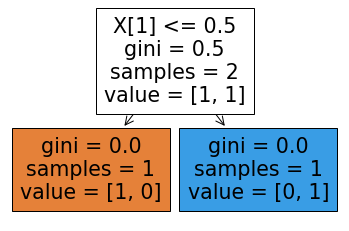

In [3]:
# display of the tree
tree.plot_tree(clf, filled=True)

### Question 1: What is the node test used to build the tree? 

The test is based on the value of the second attribute (X[1], with a threshold equal to 0.5). We can note that, in the case of this dataframe, we could have used the value of the first attribute instead of the second one, indifferently, since the datas are [0,0] for the class 0, and [1,1] for class 1 (we would have had the same tree form and predicted results). Actually, it turns out that scikit-learn sometimes chooses to use the first attribute (when executing the construction of the tree several times). The threshold selected by scikit-learn (0,5) is the value that maximises the distance between the values of the second variable of the two samples.


### Explain the prediction for the new sample.

The predicted class for the entry [2,2] is '1'.

According to the tree, in order to predict the label of the new entry [2,2], we must (first) compare the value of the second attribute (X[1] = 2) to the threshold 0.5. Since 2 > 0.5, we follow the right branch of the tree and reach a leaf (in which every elements of the training set belonged to the class 1). We therefore assign the class '1', which is the value returned by scikit-learn.

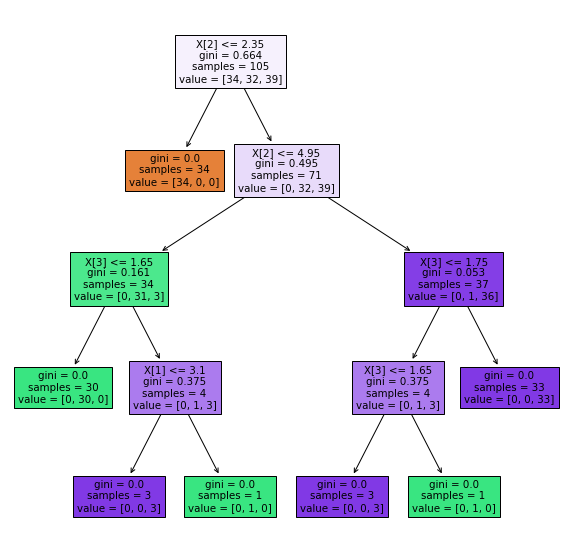

In [4]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [5]:
# prediction on the test set and computation of the accuracy
clf.predict(X_test)
clf.score(X_test, y_test)

0.9777777777777777

### Question 2: change the initial splitting of the dataset by reducing the size of the training set. 

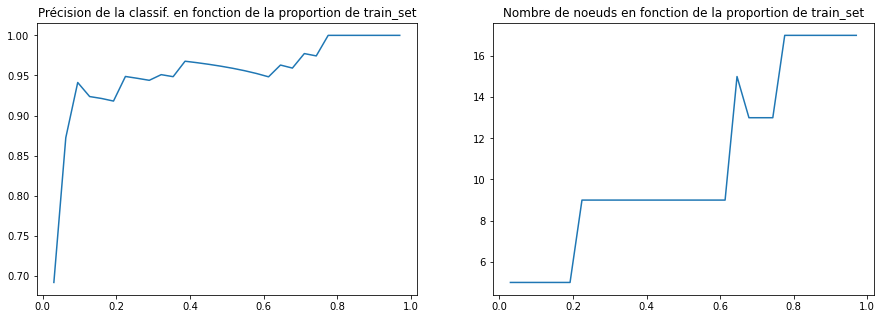

In [16]:
## Nombre noeuds dans l'arbre en fonction de la taille de l'échantillon d'apprentissage

import numpy as np

def test_dt(sets, node_count):
    X, y = iris.data, iris.target
    ts=[] 
    for i in sets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= i, random_state=0)
        clf = tree.DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        clf.predict(X_test)
        ts.append(clf.score(X_test, y_test))
        node_count.append(clf.tree_.node_count)
    return ts

borne_min=0.03
borne_max = 0.97

node_count=[]
x=np.linspace(borne_min, borne_max, 30).reshape((-1,1))
ts = test_dt(x,node_count)

fig, axes=plt.subplots(1,2,figsize=(15, 5));
axes[0].plot(x,  np.array(ts).reshape((-1,1))) ;

axes[0].title.set_text('Précision de la classif. en fonction de la proportion de train_set')
axes[1].title.set_text('Nombre de noeuds en fonction de la proportion de train_set')
plt.plot(x,  np.array(node_count).reshape((-1,1))) ;

### What do you observe on the tree? on the accuracy?

On observe que : 

- Lorsque la taille du training set augmente (tous paramètres égaux par ailleurs), la taille de l'arbre augmente (voir second graphique). 

C'est normal car il faut apprendre des nouvelles configurations pour les nouveaux échantillons (il faut davantage de tests i.e. plus de noeuds pour répartir parfaitement toutes les entrées du train_set).

- La précision augmente globalement avec la taille de l'échantillon d'entrainement (voir le second graphique).

En effet, plus il y a d'entrées dans l'échantillon d'apprentissage, plus l'arbre est précis sur les critères d'affectation à une classe ou à une autre (alors qu'avec peu de données, on a une idée peu précise des critères discriminants d'appartenance à une classe plutôt qu'à une autre). Il y a cependant un risque de surapprentissage à utiliser un trop grand nombre de données dans le train_set (l'arbre de classification est trop proche des données d'entraînement et généralise mal à de nouvelles données).

### Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...).  Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time. Conclusion?

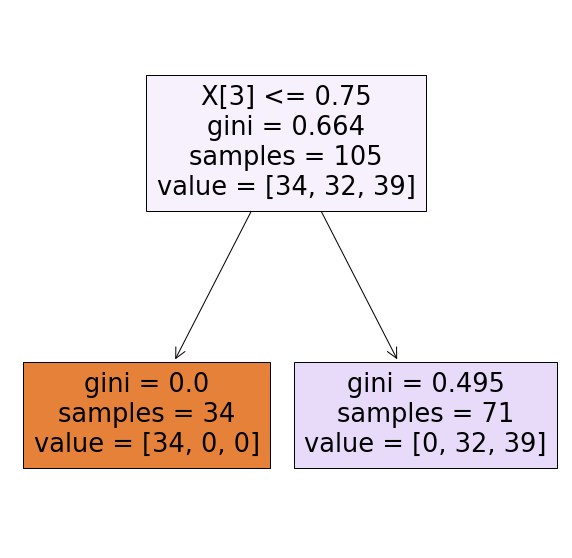

In [19]:
## Changing the max_depth parameter : 
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

Le paramètre "max_depth" permet de fixer la profondeur maximale de l'arbre de décision. On observe qu'en fixant ce paramètre, les feuilles obtenues ne sont pas pures (les échantillons d'apprentissage ne sont pas parfaitement répartis dans les différentes classes) : il y a plusieurs valeurs non nulles dans la liste "value" et le Gini est différent de 0. 

Plus on fixera une valeur faible, moins les feuilles auront de chance d'être pures. Ce paramètre permet de diminuer la complexité de l'arbre et de limiter le phénomène de sur-apprentissage (où l'arbre construit est trop proche des données d'apprentissages et généralise mal aux nouvelles données rencontrées). Il est potentiellement plus robuste aux erreurs dans les données d'apprentissage mais également potentiellement moins précis. Il faut trouver un compromis entre la précision et la capacité de généralisation du classifieur.

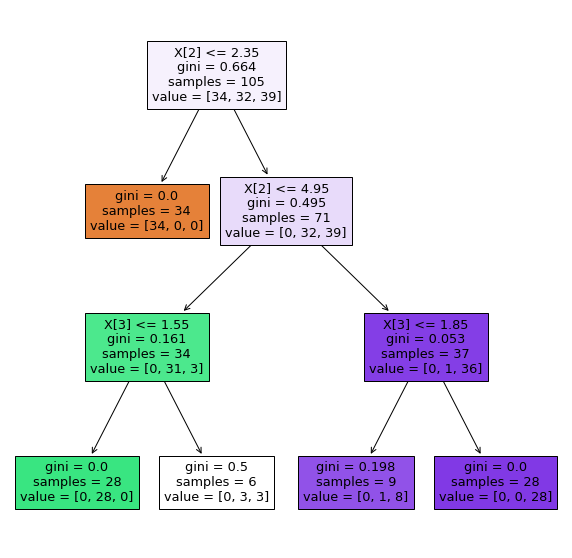

In [21]:
## Changing the min_samples_leaf parameter :
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf.fit(X_train, y_train)
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

## Extrait de la documentation : 
##Decision-tree learners can create over-complex trees that do not generalise the data well. 
##This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required 
##at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Le paramètre "min_samples_leaf" permet de fixer un nombre minimum d'éléments dans les feuilles de l'arbre (classes finales) lors de la phase d'apprentissage : la construction d'une branche de l'arbre s'arrête lorsque la feuille contient un nombre d'éléments tel que l'étape suivante le ferait passer en-dessous d'un seuil. 

De la même manière que la profondeur maximale, il permet de limiter le surapprentissage. Il est moins arbitraire que le paramètre de profondeur maximale et permet d'avoir des branches de tailles différentes.

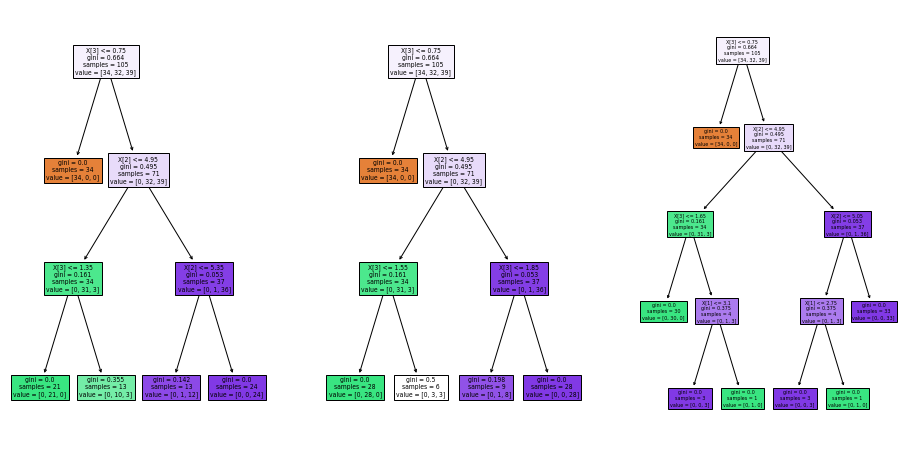

In [22]:
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf1 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 12)
clf1.fit(X_train, y_train)
clf2 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)
clf2.fit(X_train, y_train)
clf3 = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)
clf3.fit(X_train, y_train)

#display
fig=plt.figure(figsize=(16,8))
axes = fig.subplots(1,3)
tree.plot_tree(clf1,filled=True, ax=axes[0])
tree.plot_tree(clf2,filled=True, ax=axes[1])
tree.plot_tree(clf3,filled=True, ax=axes[2])
axes[0].set_title= 'min_samples_leaf = 12'
axes[1].set_title= 'min_samples_leaf = 5'
axes[2].set_title= 'min_samples_leaf = 1'

plt.show()

Ces trois graphes montrent que, à profondeur maximale fixée, plus le paramètre min_samples_leaf est grand, plus l'arbre s'étale en largeur car, pour chaque noeud, l'algorithme oblige à séparer au moins 'min_samples_leaf' dans chaque noeuds fils. Cela a une incidence sur la performance de l'algorithme si cette valeur est trop grande.

In [23]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


### Question 4: By testing different trees (built with different parameter values), does a class appear as easier to classify than the others?

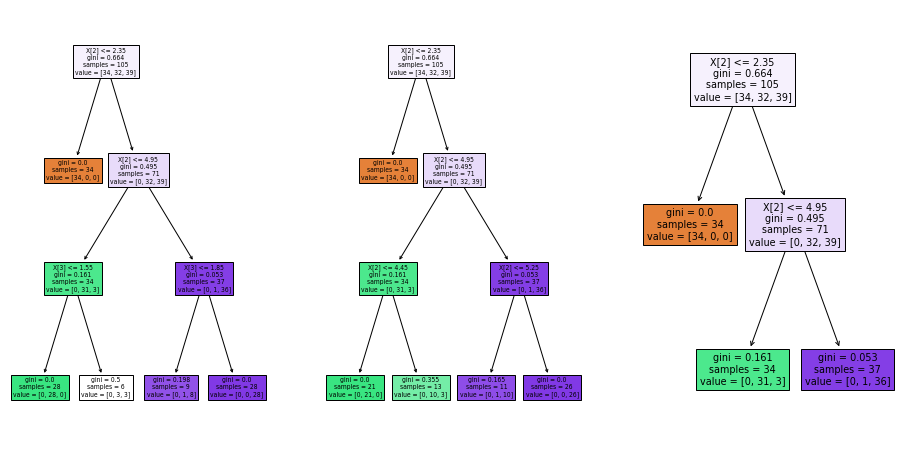

In [27]:
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf1 = tree.DecisionTreeClassifier(min_samples_leaf = 5)
clf1.fit(X_train, y_train)

clf2 = tree.DecisionTreeClassifier(min_samples_leaf = 10)
clf2.fit(X_train, y_train)

clf3 = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf3.fit(X_train, y_train)


#display
fig=plt.figure(figsize=(16,8))
axes = fig.subplots(1,3)
tree.plot_tree(clf1,filled=True, ax=axes[0])
tree.plot_tree(clf2,filled=True, ax=axes[1])
tree.plot_tree(clf3,filled=True, ax=axes[2])
axes[0].set_title= 'min_samples_leaf = 5'
axes[1].set_title= 'min_samples_leaf = 10'
axes[2].set_title= 'min_samples_leaf = 20'

plt.show()

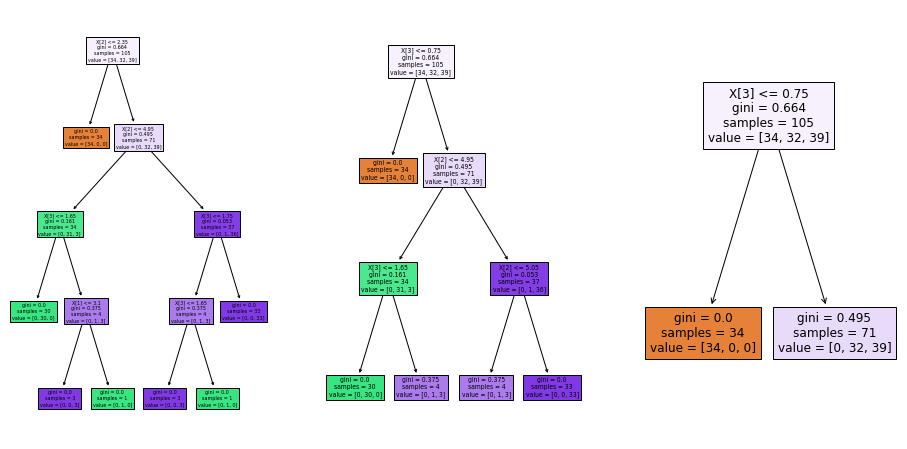

In [28]:
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

clf1 = tree.DecisionTreeClassifier(max_depth = 10)
clf1.fit(X_train, y_train)

clf2 = tree.DecisionTreeClassifier(max_depth = 3)
clf2.fit(X_train, y_train)

clf3 = tree.DecisionTreeClassifier(max_depth = 1)
clf3.fit(X_train, y_train)


#display
fig=plt.figure(figsize=(16,8))
axes = fig.subplots(1,3)
tree.plot_tree(clf1,filled=True, ax=axes[0])
tree.plot_tree(clf2,filled=True, ax=axes[1])
tree.plot_tree(clf3,filled=True, ax=axes[2])
axes[0].set_title= 'min_samples_leaf = 5'
axes[1].set_title= 'min_samples_leaf = 10'
axes[2].set_title= 'min_samples_leaf = 20'

plt.show()

On observe que dans tous les arbres de décision générés précédemment, le premier test aboutit systématiquement à une première feuille contenant les éléments de la classe '0' (et ce, même en utilisant des données d'apprentissage aléatoires). On en déduit la classe 0 est plus simple que les autres à discriminer.

Les deux autres classes semblent plus difficiles à séparer : il faut à chaque fois plusieurs tests sur plusieurs variables pour parvenir à une répartition parfaite (quand on ne fixe pas de condition d'arrêt prématuré).

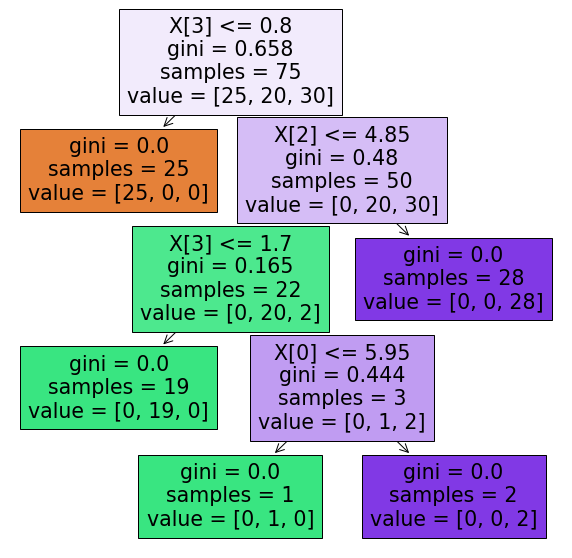

[[25  0  0]
 [ 0 26  4]
 [ 0  1 19]]


In [25]:
from sklearn.metrics import confusion_matrix
X, y = iris.data, iris.target

# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 

cm = confusion_matrix(y_test, clf.predict(X_test))

plt.show()
print(cm)

La matrice de confusion confirme que la première classe est plus facile à détecter / discriminer que les autres. Il n'y a pas d'erreur de classification dans la première classe, il y a des erreurs pour les deux autres classes. 